<a href="https://colab.research.google.com/github/Navbaloo/Fake-news-detection-system/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
import random
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score


In [ ]:
# Load the data
fake_news = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/refs/heads/main/data/Fake.csv')
real_news = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/refs/heads/main/data/True.csv')

In [ ]:
# first look of the data set
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
# information of the data set
real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
fake_news.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
real_news.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
fake_news['subject'].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


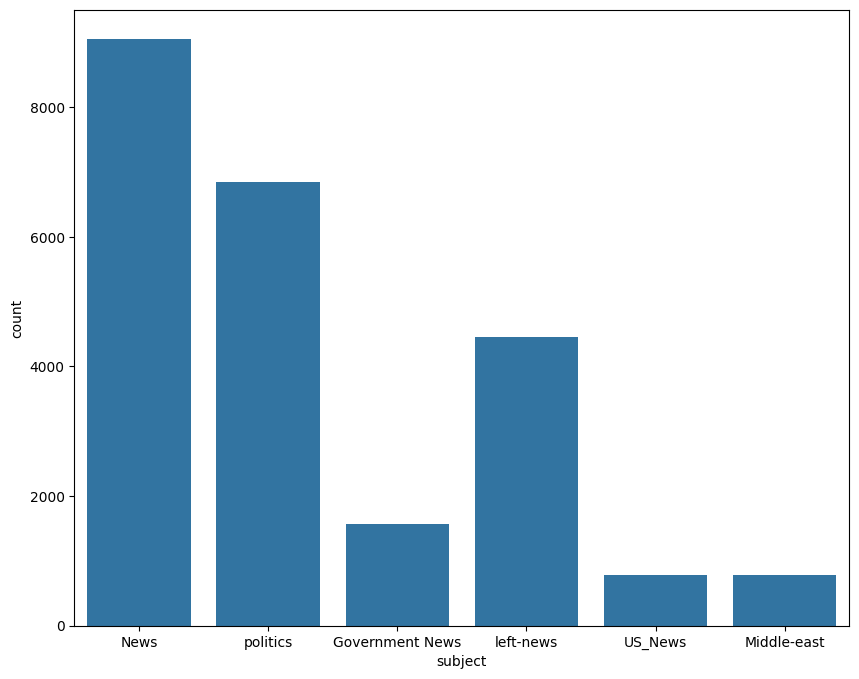

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x='subject', data = fake_news)
plt.show()


In [ ]:
text_fake = " ".join(fake_news['text'].tolist())
text_fake

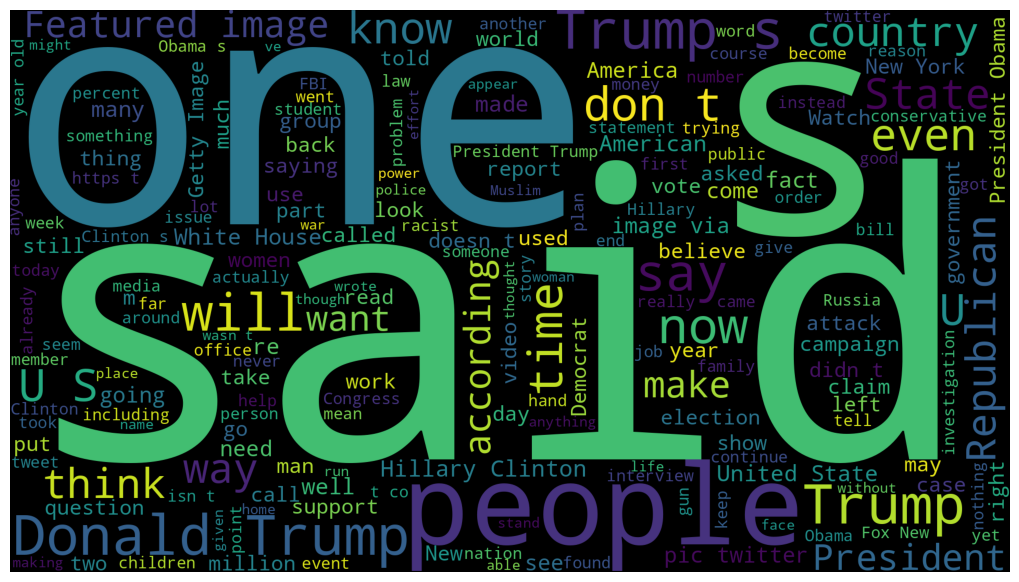

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text_fake)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text_real = ' '.join(real_news['text'].tolist())

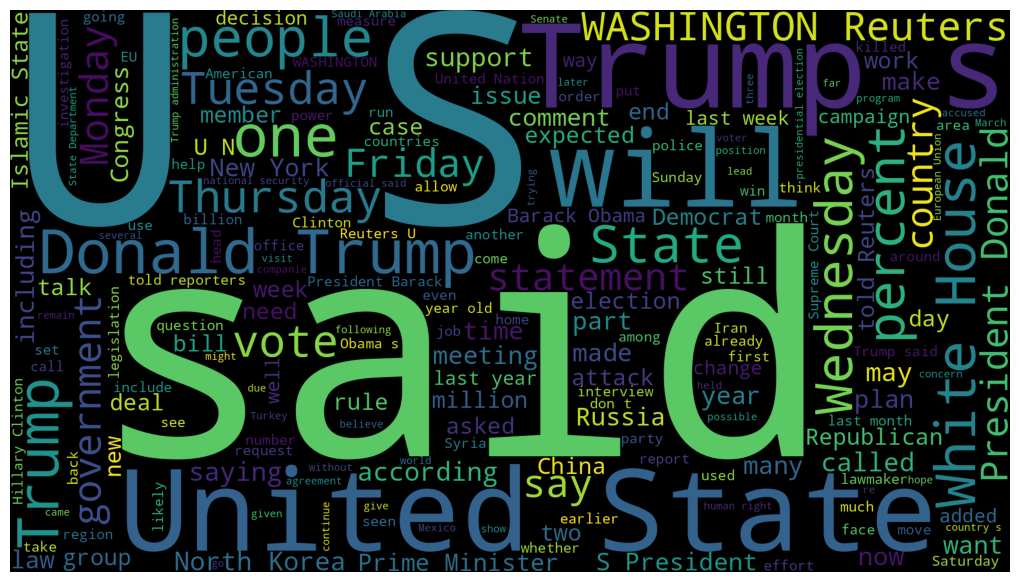

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text_real)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real_news['class'] = 1
fake_news['class'] = 0

In [ ]:
real_news.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake_news.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
real = real_news[['text','class']]
fake = fake_news[['text','class']]


In [ ]:
real

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [ ]:
fake

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


In [ ]:
data = pd.concat([real, fake], axis = 0)
data.shape

(44898, 2)

In [ ]:
# Shuffling the rows
data = data.sample(frac=1).reset_index()

In [ ]:
data.head(10)

,index,text,class
0,3053,WASHINGTON (Reuters) - A White House spokesman...,1
1,22288,21st Century Wire says Despite the mass media ...,0
2,17948,This summer s box office numbers were the wors...,0
3,7096,WASHINGTON (Reuters) - U.S. President-elect Do...,1
4,2962,Before running the most controversial and bomb...,0
5,23272,21st Century Wire says If you have only recent...,0
6,23356,21st Century Wire asks HAVE YOUR SHOUT: We ask...,0
7,10270,WASHINGTON (Reuters) - Former Republican presi...,1
8,20660,NEW DELHI (Reuters) - India has issued new nor...,1
9,17854,ATHENS (Reuters) - A mental health emergency i...,1


In [ ]:
data['text'].shape

(44898,)

In [ ]:
# Step 1: Train (90%) + Test (10%)
X_train, X_test, y_train, y_test = train_test_split(
    data['text'].to_numpy(),
    data['class'].to_numpy(),
    test_size=0.1,          # 10% test set
    random_state=42,
    shuffle=True
)

# Step 2: From Train, take 10% for Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.1,          # 10% of train → validation
    random_state=42,
    shuffle=True
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

Train size: 36367
Validation size: 4041
Test size: 4490


In [ ]:
# Tokenisation layer
text_vectorization = TextVectorization(max_tokens=None, standardize='lower_and_strip_punctuation',
                                       split ='whitespace', ngrams = None,
                                       output_mode = 'int', output_sequence_length = 405 )

In [ ]:
text_vectorization.adapt(X_train)

In [ ]:
random_sentence = random.choice(X_train)
print(random_sentence)
text_vectorization(random_sentence)

John Kerry gave a long-winded speech today claiming the Obama administration had been a friend to Israel. He went on and on describing the support to the Israeli military. He was clearly on the defensive after the debacle of the US abstaining in a vote by the UN Security Council to punish Israel. It s been no secret that the Obama administration has been anti-Israel from the beginning, so Kerry s speech was wasted air time. No one believes anything John Kerry says his credibility had been lost long ago. All you need to know about him was revealed when he flew singer James Taylor to Paris to sing  You ve Got A Friend  after the horrific terror attack by Islamic terrorists. Obama and Kerry are clearly of the pacifist school of thought that will clear a path for the destruction of the West and Israel.During his speech today he asked that Israel move its borders back to the 1967 location something Obama had previously stated he d like to see Israel do WHAT ARE THESE TWO SMOKING? 


<tf.Tensor: shape=(405,), dtype=int64, numpy=
array([   311,   2850,    636,      5,  42958,    298,    359,   1640,
            2,     76,    147,     42,     45,      5,   1360,      3,
          572,     14,    360,      9,      6,      9,   3207,      2,
          146,      3,      2,   1438,    173,     14,     18,    849,
            9,      2,   5634,     53,      2,  10221,      4,      2,
           33,  27651,      7,      5,    161,     21,      2,    433,
          121,    547,      3,   3908,    572,     15,     10,     45,
           67,   1006,      8,      2,     76,    147,     22,     45,
        13116,     26,      2,   1549,     77,   2850,     10,    298,
           18,   6550,    518,    100,     67,     54,   1282,    508,
          311,   2850,    189,     20,   2900,     42,     45,    635,
          286,    519,     55,     43,    231,      3,    155,     39,
           80,     18,   1393,     60,     14,   3901,   4325,    755,
         4566,      3,   1047, 

In [ ]:
avg_len = data['text'].apply(lambda x: len(x.split())).mean().round()
print("Average sentence length (words):", avg_len)

Average sentence length (words): 405.0


In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")   # OOV handles unseen words
tokenizer.fit_on_texts(X_train)

# Vocab size
vocab_size = len(tokenizer.word_index) + 1   # +1 for padding token (index 0)
print("Vocab size:", vocab_size)

Vocab size: 126011


In [ ]:
# Embedding layer
embedding = layers.Embedding(input_dim=vocab_size, output_dim = 128,
                             input_length = avg_len)
embedding

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding, built=False>

In [ ]:
# Embedding sample
rand_sen = random.choice(X_train)
print(rand_sen)
sample_embedding = embedding(text_vectorization([rand_sen]))
sample_embedding

So in an effort to reach out to Muslims living in America, we need to invite groups that are tied to terrorists? Why stop at groups like CAIR? Why not invite ISIS? Perhaps we missed it, but we haven t seen the list of prominent Christian leaders invited to Obama s SOTU, who will represent the worldwide mass persecution of Christians As many as 25 House Democrats are expected to have Muslim guests during Tuesday night s State of the Union speech. It s in response to a call from Democratic National Committee chair Debbie Wasserman Schultz and Minnesota Rep. Keith Ellison, the first Muslim voted into Congress, to counter an  alarming rise in hateful rhetoric against Muslim Americans and people of the Islamic faith worldwide. The gesture might not generate much more than a shrug, except that in at least two cases, Democrats invited officials from a group the FBI formally avoids due to historic ties to a Hamas support network.Delray Beach Rep. Alcee Hastings invited Nezar Hamze, regional op

<tf.Tensor: shape=(1, 405, 128), dtype=float32, numpy=
array([[[-0.03106251, -0.00807723,  0.04762128, ...,  0.02110093,
         -0.02872725,  0.02273459],
        [-0.02446781,  0.03753907, -0.04426414, ...,  0.02978089,
          0.02264899, -0.02098372],
        [ 0.00712534,  0.01996081, -0.02298426, ..., -0.00840107,
          0.01573444, -0.03136506],
        ...,
        [-0.00016524,  0.02959159, -0.03993869, ..., -0.01753791,
         -0.01729202, -0.03221732],
        [ 0.03663564, -0.0263409 , -0.01917884, ..., -0.01740737,
          0.00282624, -0.0262795 ],
        [ 0.0012852 , -0.02673097, -0.01496888, ..., -0.02585601,
         -0.0249567 ,  0.03919515]]], dtype=float32)>

In [ ]:
# Lstm Model 1
inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorization(inputs)
x = embedding(x)
x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(128, activation = 'tanh')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name = 'Model_1_Lstm')

In [ ]:
# Compile the model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# Fit the model
model_1_history = model_1.fit(X_train, y_train,
                              epochs =5, validation_data = (X_val, y_val))

Epoch 1/5
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 52s 42ms/step - accuracy: 0.7130 - loss: 0.5173 - val_accuracy: 0.7817 - val_loss: 0.5110
Epoch 2/5
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.9779 - loss: 0.0912 - val_accuracy: 0.9968 - val_loss: 0.0179
Epoch 3/5
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 58s 51ms/step - accuracy: 0.9966 - loss: 0.0187 - val_accuracy: 0.9970 - val_loss: 0.0176
Epoch 4/5
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.9979 - loss: 0.0137 - val_accuracy: 0.9968 - val_loss: 0.0164
Epoch 5/5
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.9979 - loss: 0.0116 - val_accuracy: 0.9990 - val_loss: 0.0048


In [ ]:
y_pred = model_1.predict(X_test)

141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


In [ ]:
model_1_prediction = tf.squeeze(tf.round(y_pred))
model_1_prediction[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 1., 0., 0., 0., 1.], dtype=float32)>

In [ ]:
accuracy_score(model_1_prediction, y_test )

0.9984409799554566